In [2]:
import ROOT
import Tune
import TOT
import TOTAna

In [3]:
#Tuning parameters
vndacs = [32]
tdacs = [0,1,2,3,4,5]
vmax=0.5
npoints=26
device = "ap1b02w23s13"
vnpix=40
vnfb = 20

target=0.2

datafolder = "/home/peary/peary/PEARYDATA"

In [4]:
#Process SCurves raw data for each tdacs, extract threshold value per pixel

for TDAC in tdacs:
    print "processing TDAC %i"%TDAC
    f = ROOT.TFile("%s/%s/Tuning_%s_VNDAC%i.root"%(datafolder,device,device,vndacs[0]),"update")
    Tune.PlotTDACs(device, vndacs[0], TDAC, "%s/%s/SCURVE_VNDAC%i_TDAC%i.txt" % (datafolder,device, vndacs[0], TDAC), vmax,npoints,n_pulses=50,rootfile=f)
    
print "Done"

processing TDAC 0


processing TDAC 1


processing TDAC 2


processing TDAC 3


processing TDAC 4


processing TDAC 5


Done


In [5]:
# Obtain an optimized TDAC map using SCurve data for each TDAC and generate expected threshold distribution plots

target = 0.16
for VNDAC in vndacs:
    f = ROOT.TFile("%s/%s/Tuning_%s_VNDAC%i.root"%(datafolder,device,device,vndacs[0]),"update")
    Tune.tune(f,VNDAC,tdacs,target,vmax)
print "Done"

Target 0.160000 V
[<ROOT.TH2D object ("THMAP_TDAC0") at 0x563bf95c6680>, <ROOT.TH2D object ("THMAP_TDAC1") at 0x563bfdf44020>, <ROOT.TH2D object ("THMAP_TDAC2") at 0x563c0084a910>, <ROOT.TH2D object ("THMAP_TDAC3") at 0x563c0bf954b0>, <ROOT.TH2D object ("THMAP_TDAC4") at 0x563c09a248c0>, <ROOT.TH2D object ("THMAP_TDAC5") at 0x563c04b83520>]
Processing column 0


Processing column 1


Processing column 2


Processing column 3


Processing column 4
Processing column 5


Processing column 6
Processing column 7


Processing column 8


Processing column 9


Processing column 10
Processing column 11


Processing column 12
Processing column 13


Processing column 14


Processing column 15


Processing column 16


Processing column 17
Processing column 18


Processing column 19


Processing column 20


Processing column 21
Processing column 22


Processing column 23


Processing column 24


Error in <TFile::mkdir>: An object with name fits exists already


In [7]:
# Plot SCurves and threshold distribution after tuning (result of VerifyTuning)
f = ROOT.TFile("%s/%s/Tuning_%s_VNDAC%i.root"%(datafolder,device,device,vndacs[0]),"update")
Tune.PlotTDACs(device,vndacs[0], 10, "%s/%s/SCURVE_TDAC_verification.txt"%(datafolder,device),vmax,npoints,rootfile=f)

In [6]:

#re-open the results root file containing all the plots
f = ROOT.TFile("%s/%s/Tuning_%s_VNDAC%i.root"%(datafolder,device,device,vndacs[0]),"update")

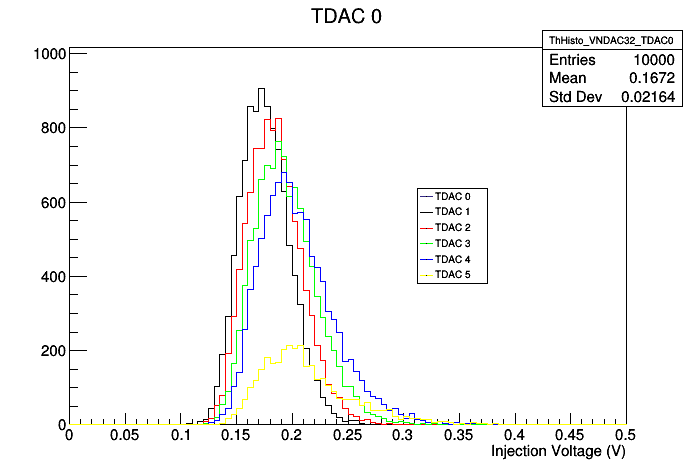

In [7]:
#Plotting threshold distribution vs TDAC

thHistos = []
for VNDAC in vndacs:
    for TDAC in tdacs:
        histo = f.Get("ThHisto_VNDAC%i_TDAC%i"%(VNDAC,TDAC))
        thHistos.append(histo)

can = ROOT.TCanvas()
thHistos[0].Draw("PLC")
thHistos[0].SetTitle("TDAC %i"%(tdacs[0]))
thHistos[0].GetXaxis().SetTitle("Injection Voltage (V)")
for i,histo in enumerate(thHistos[1:]):
    histo.Draw("same")
    histo.SetLineColor(i+1)
    histo.SetTitle("TDAC %i"%(tdacs[i+1]))

can.BuildLegend(0.6,0.4,0.7,0.6)
can.Draw()

#f_ap1b02w23s13.Close()


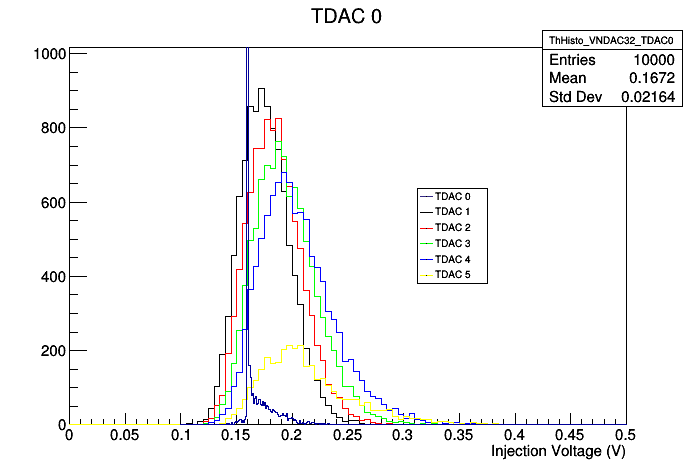

In [8]:
#adding predicted Threshold distribution

best_th= f.Get("best th")
can3 = ROOT.TCanvas()


thHistos[0].Draw("PLC")
thHistos[0].SetTitle("TDAC %i"%(tdacs[0]))
thHistos[0].GetXaxis().SetTitle("Injection Voltage (V)")
for i,histo in enumerate(thHistos[1:]):
    histo.Draw("same")
    histo.SetLineColor(i+1)
    histo.SetTitle("TDAC %i"%(tdacs[i+1]))

can3.BuildLegend(0.6,0.4,0.7,0.6)
can3.SetWindowSize(1024,1024)
can3.Draw()
# 
best_th.Draw("same")
can3.Draw()


<ROOT.TH1D object ("ThHisto_VNDAC63_TDAC10") at 0x560e87cdf270>


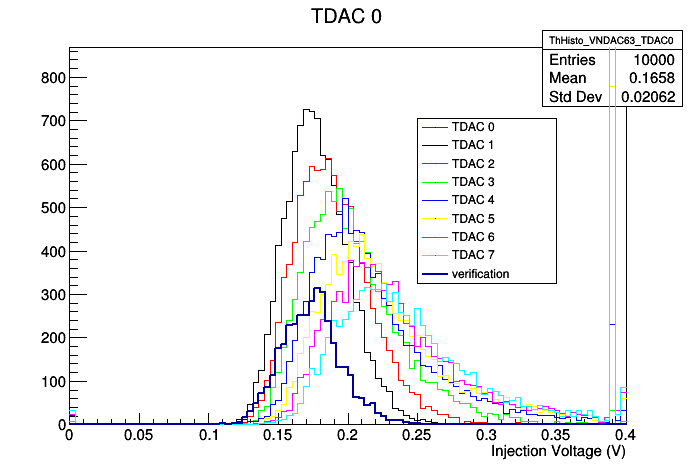

In [11]:
# adding the measured final threshold distribution

h = f.Get("ThHisto_VNDAC%i_TDAC10"%(vndacs[0]))
#f.ls()
print h
can4= ROOT.TCanvas()

thHistos[0].Draw("PLC")
thHistos[0].SetTitle("TDAC %i"%(tdacs[0]))
thHistos[0].GetXaxis().SetTitle("Injection Voltage (V)")
for i,histo in enumerate(thHistos[1:]):
    histo.Draw("same")
    histo.SetLineColor(i+1)
    histo.SetTitle("TDAC %i"%(tdacs[i+1]))

h.Draw("same")
h.SetLineWidth(2)
h.SetTitle("verification")
can4.BuildLegend(0.6,0.4,0.8,0.75)
can4.SetWindowSize(1024,1024)
#best_th.Draw("same")

can4.Draw()

[SourceTree] parsing data file /home/peary/peary/PEARYDATA/ap1b02w23s13/data_Tritium.txt


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


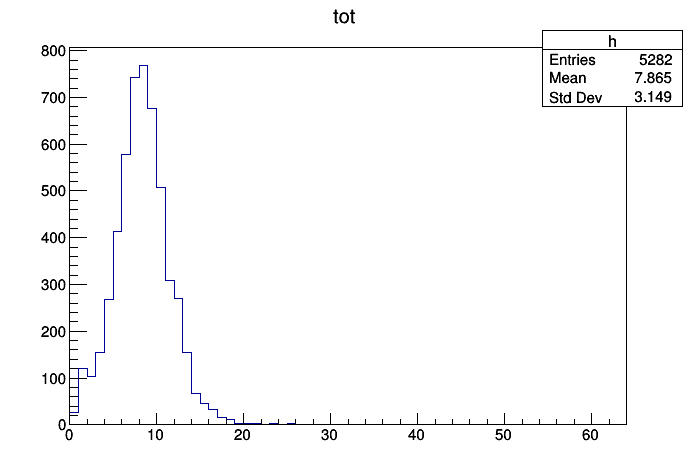

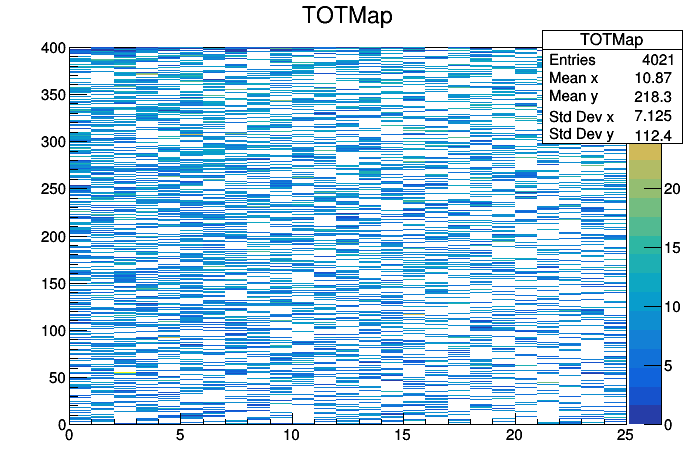

In [4]:
# PLot TOT and hitmap for a raw data of a source exposure
rootfile = ROOT.TFile("%s/%s/TOT_Tritium_%s.root"%(datafolder,device,device),"recreate")
TOTAna.MakeSourceTree("/home/peary/peary/PEARYDATA/ap1b02w23s13/data_Tritium.txt",rootfile)

tothisto,XY=TOTAna.plotTOT(rootfile)

can5 = ROOT.TCanvas()
tothisto.Draw()
can5.Draw()
can7 = ROOT.TCanvas()
XY.Draw("colz")
can7.Draw()

Error in <TFile::mkdir>: An object with name single pixel tot exists already


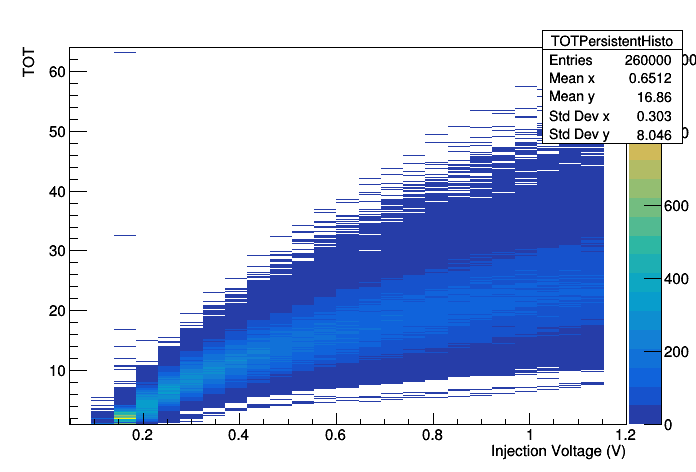

In [18]:
# Plot TOT vs pulser for all pixels, result from MeasureTOT

import TOT

TOT.PlotTOTs(device,"%s/%s/TOT_VNFBPix%i_VNPix%i.txt"%(datafolder,device,20,40),1.2,51,20,40)

#Pixel TOT surrogate
f2 = ROOT.TFile("%s/%s/TOT_ap1b02w06s12_VNFB20_VNPix40.root"%(datafolder,device))
h2 = f2.Get("TOTPersistentHisto")
can6 = ROOT.TCanvas()
h2.Draw("colz")
h2.GetXaxis().SetTitle("Injection Voltage (V)")
h2.GetYaxis().SetTitle("TOT")

can6.Draw()
